# Holly's Lab 10 (4/5): Iteration and Models

**Homework:**
*  Last Homework!!!

*  Final projects due Dec 14th (13 more days)... NO LATE PROJECTS ACCEPTED.

*  Lab next week will just be time for you to work on your projects and office hours.



## Load Packages

In [1]:
library(tidyverse)
library(modelr)
options(na.action = na.warn)

set.seed(5678)

Warning message:
"package 'tidyverse' was built under R version 4.1.1"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.1.0"
Warning message:
"package 'tibble' was built under R version 4.1.1"
Warning message:
"package 'tidyr' was built under R version 4.1.1"
Warning message:
"package 'readr' was built under R version 4.1.1"
Warning message:
"package 'purrr' was built under R version 4.1.1"
Warning message:
"package 'dplyr' was built under R version 4.1.0"
Warning message:
"package 'stringr' was built under R version 4.1.1"
Warning message:
"package 'forcats' was built under R version 4.1.1"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() -

# Recap
Last time we talked about functions and using them as a way to reduce code. 

Key points:
- Keep it simple.
- Don't repeat code.

# Iteration

Another way to help reduce code duplication is through iteration.

**Iteration**- helps you when you need to do the same thing to multiple inputs: repeating the same operation on different columns, on different datasets, or through different items of a vector.

In `r` the best way to iterate is a for loop. For each item in this vector, do this....

Every for loop has three components:



1.   **Output-** "Before you start the loop, you must always allocate sufficient space for the output. This is very important for efficiency: if you grow the for loop at each iteration using c() (for example), your for loop will be very slow. A general way of creating an empty vector of given length is the vector() function. It has two arguments: the type of the vector (“logical”, “integer”, “double”, “character”, etc) and the length of the vector."

2.   **Sequence-** The vector you want to iterate over.

    *   An already named vector
    *   A numeric vector `1:n`
    *   A vector created on the fly: `c("x", "y", "z")`
    *   The sequence along or length of a vector, or width of a tibble. `seq_along()` is safer to use than `1:length(x)` incase `x` has a length of `0`.

3.  **Body-** what do you actually want to do to each piece.

Think about the output, sequence, and body **before** you start writing the loop.







In [2]:
diamondsNum <- diamonds %>% select(where(is.numeric))

In [3]:
#find the min for each numeric in the diamonds dataset

output <- vector("double", ncol(diamondsNum))  # 1. output
for (i in seq_along(diamondsNum)) {            # 2. sequence
  output[[i]] <- min(diamondsNum[[i]])         # 3. body
}
output

[1]   0.2  43.0  43.0 326.0   0.0   0.0   0.0

### Challenges:

Create a for loop which will find the mean of each numeric variable in the iris dataset.

In [4]:
irisNum <- iris %>% select(where(is.numeric))

## Variations

Other things you can do with for loops:
*   Modifying an existing object, instead of creating a new object.
*   Looping over names or values, instead of indices.
*   Handling outputs of unknown length.
*   Handling sequences of unknown length.




### Modifing an existing object

In [5]:

df <- tibble(                       # Output
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)
rescale01 <- function(x) {          # Sequence
  rng <- range(x, na.rm = TRUE)     # Body
  (x - rng[1]) / (rng[2] - rng[1])
}

print(df)

# A tibble: 10 x 4
        a       b      c      d
    <dbl>   <dbl>  <dbl>  <dbl>
 1 -0.294 -1.00    1.00  -0.759
 2 -0.243 -1.35    1.32   0.554
 3 -0.207 -0.727  -0.399 -1.06 
 4 -0.945  0.392   2.59  -0.346
 5 -1.07  -2.06    2.13  -1.42 
 6 -1.43  -0.516   1.79  -0.126
 7 -0.113  0.823  -0.237 -1.24 
 8  1.83   0.0238  0.747  1.33 
 9  0.297  0.224   1.43  -0.186
10  1.67  -1.19    0.203 -0.437


In [6]:
for (i in seq_along(df)) {
  df[[i]] <- rescale01(df[[i]])
}

print(df)

# A tibble: 10 x 4
       a     b      c      d
   <dbl> <dbl>  <dbl>  <dbl>
 1 0.349 0.368 0.469  0.240 
 2 0.364 0.247 0.574  0.717 
 3 0.375 0.463 0      0.132 
 4 0.149 0.851 1      0.391 
 5 0.110 0     0.848  0     
 6 0     0.536 0.732  0.470 
 7 0.404 1     0.0545 0.0651
 8 1     0.723 0.384  1     
 9 0.530 0.793 0.611  0.448 
10 0.949 0.304 0.202  0.357 


**RECALL** `[[]]` gets a single element of a data frame or list and `[]` gets the list with just that item in it. It is good practice to use `[[]]`.

### Looping Patterns

There are three main ways to iterate through a vector `x`:


1.   By position using `for (i in seq_along(x))` then calling something like `x[[i]]`
2.   By element using `for (i in x)` then calling something like `print(i)`
3.   By name using `for (nm in names(x))` which is helpful if you want to include the names in the output. You can access the values by `x[[nm]]`

However, out of all of these, the first is the most standard as with the position we can access both the name and the value, where with the other two we cannot access position.



In [7]:
x <- 1:15
names(x) <- 1:15
for (i in seq_along(x)) {
  name <- names(x)[[i]]
  value <- x[[i]]
}

#### Challenge:
Write a function that will compute the number of unique values in each column of a given dataset.

In [8]:
findUniques <- function(x)
{
  
}

In [9]:
findUniques(iris) %>% print()

NULL


In [10]:
findUniques(diamonds) %>% print()

NULL


### Unknown output length

Every time R changes the length of a vector, it creates a new vector of longer length and then copy the items one by one over. If you change the length a lot of times, it does this a lot of times... which takes a lot of time.

A better solution is to use a list and change it to a vector when you are done.

In [11]:
means <- c(0, 1, 2)

out <- vector("list", length(means))
for (i in seq_along(means)) {
  n <- sample(100, 1)
  out[[i]] <- rnorm(n, means[[i]])
}
str(out)

List of 3
 $ : num [1:30] -0.6469 -0.0489 1.0754 -0.4751 -0.4561 ...
 $ : num [1:25] -1.458 -1.154 0.423 1.548 0.527 ...
 $ : num [1:13] 1.34 3.28 1.67 1.86 3.67 ...


In [12]:
str(unlist(out))

 num [1:68] -0.6469 -0.0489 1.0754 -0.4751 -0.4561 ...


### Unknown sequence length

In the sense of data science, this is weird to think about, because we always have a set number of rows, but if you wanted to look for a specific value, you don't need to keep looking after you find it. It is also helpful for simulations, (ie. keep producing random numbers from a normal distribution until I get one that is higher than 3 sd's, or roll 5 dice till I get yatzee (all five are equal)).

In [13]:
tries <- 0
same <- FALSE

dice <- vector("double", 5)

while (! same)
{
  for (i in seq_along(dice))
  {
    dice[[i]] <- sample(1:6, 1)
  }
  if (dice[[1]] == dice[[2]] & dice[[2]] == dice[[3]] & dice[[3]] == dice[[4]] 
        & dice[[4]] == dice[[5]])
  {
    same <- TRUE
  }
  tries <- tries + 1
}

tries

[1] 353

A while loop is also more general than a for loop, because you can rewrite any for loop as a while loop, but you can’t rewrite every while loop as a for loop:

In [14]:
for (i in seq_along(x)) {
  # body
}

# Equivalent to
i <- 1
while (i <= length(x)) {
  # body
  i <- i + 1 
}

#### Challenge

Write a loop to see how many random numbers it takes before you get one higher than 3 standard deviations above the mean from a N(0,1) distribution.

In [15]:
?rnorm

### Functionals

It is helpful to note that in `r` a function can be passed as the argument of a function.

In [16]:
col_summary <- function(df, fun) {
  out <- vector("double", length(df))
  for (i in seq_along(df)) {
    out[i] <- fun(df[[i]])
  }
  out
}
col_summary(irisNum, median) %>% print()
col_summary(diamondsNum, mean) %>% print()
col_summary(iris, length) %>% print()

[1] 5.80 3.00 4.35 1.30
[1]    0.7979397   61.7494049   57.4571839 3932.7997219    5.7311572
[6]    5.7345260    3.5387338
[1] 150 150 150 150 150


Map functions simplify this process further as our `col_summary()` function is basically the same as mapping. (which comes from the `purrr` package in `tidyverse`). Mapping preserves names, though we could modify our function to also preserve names.

In [17]:
map_dbl(irisNum, median) %>% print()
map_dbl(diamondsNum, mean) %>% print()
map_dbl(iris, length) %>% print()

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
        5.80         3.00         4.35         1.30 
       carat        depth        table        price            x            y 
   0.7979397   61.7494049   57.4571839 3932.7997219    5.7311572    5.7345260 
           z 
   3.5387338 
Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
         150          150          150          150          150 


# Models

Models are a way to predict a trend in data. Think of them as "lines" of best fit, though, they don't have to always be lines, and often they are multiple dimensions.

Two parts to a model:

1.  Define the family, what generic pattern do you want to capture? (line, quadratic curve, quartic, log function, etc...)

2.  Generate a fited model. Find the member of that family **closest** to your data.

"All models are wrong, but some are useful." -George Box 

## A Simple Model

We are going to look at sepal length and width for the setosa iris species.

In [18]:
setosa <- iris %>% 
  filter(Species == "setosa") %>% 
  select(Sepal.Length, Sepal.Width)

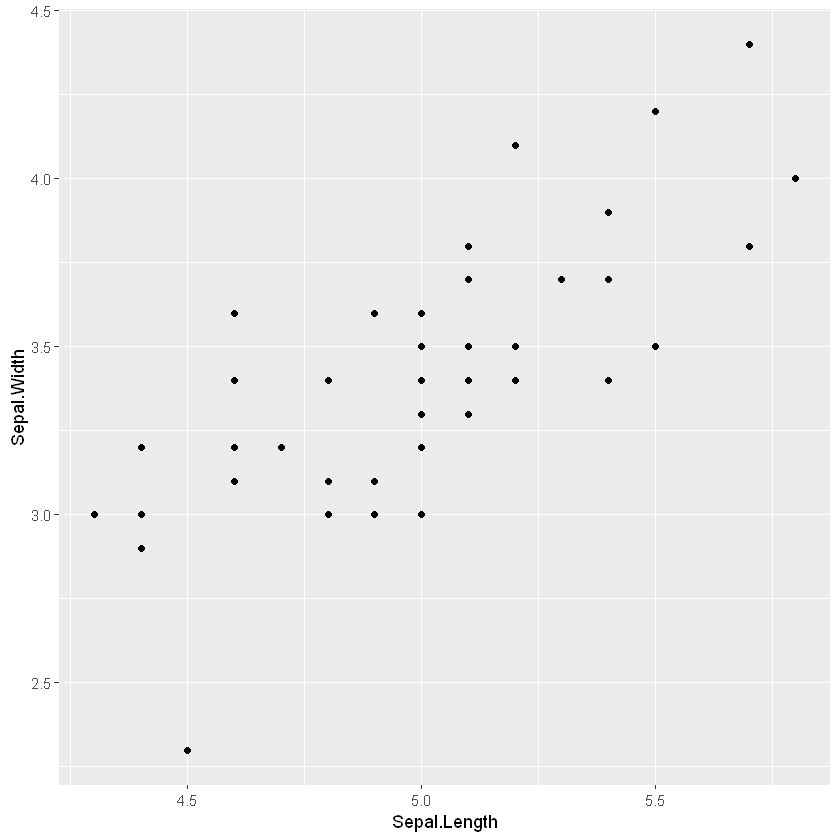

In [19]:
ggplot(setosa, aes(Sepal.Length, Sepal.Width)) + 
  geom_point()

This data looks fairly linear (though maybe not super strong), but still, lets see if we can find the best relationship. 

Linear relationships will be of the form `y = m * x + b` or `Sepal.Width = a1 + a2 * Sepal.Length`. Quadratics are of the form `y = a + b * x + c * x ^ 2`

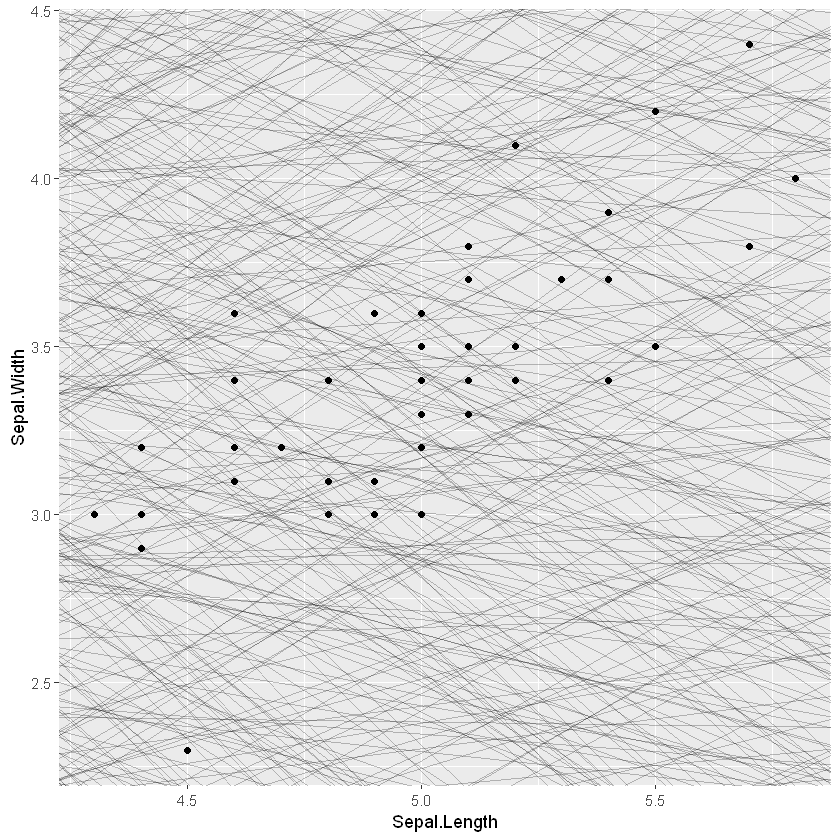

In [20]:
#create a bunch of random models... most are not super great...

models <- tibble(
  a1 = runif(5000, -2, 10),
  a2 = runif(5000, -5, 5)
)
 
# geom_abline() takes a slope and intercept as parameters
ggplot(setosa, aes(Sepal.Length, Sepal.Width)) + 
  geom_abline(aes(intercept = a1, slope = a2), data = models, alpha = 1/4) +
  geom_point() 

To find the best model, we want to minimize the errors, or deviations from our actual points (response) to the model (prediction). 

This picture is a different model, but the idea is the same.

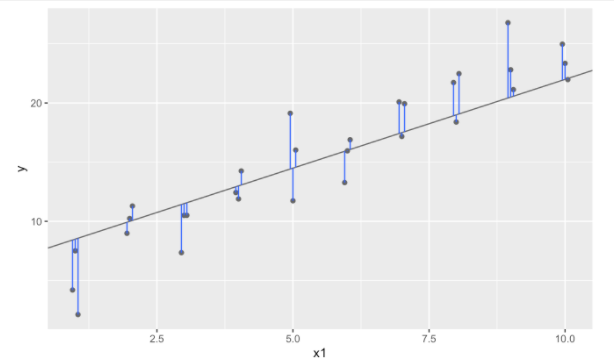

In [21]:
#make a function which fits the model....
model1 <- function(a, data) {
  a[1] + data[1] * a[2]
}
model1(c(-1.5, 1), setosa) %>% print()

   Sepal.Length
1           3.6
2           3.4
3           3.2
4           3.1
5           3.5
6           3.9
7           3.1
8           3.5
9           2.9
10          3.4
11          3.9
12          3.3
13          3.3
14          2.8
15          4.3
16          4.2
17          3.9
18          3.6
19          4.2
20          3.6
21          3.9
22          3.6
23          3.1
24          3.6
25          3.3
26          3.5
27          3.5
28          3.7
29          3.7
30          3.2
31          3.3
32          3.9
33          3.7
34          4.0
35          3.4
36          3.5
37          4.0
38          3.4
39          2.9
40          3.6
41          3.5
42          3.0
43          2.9
44          3.5
45          3.6
46          3.3
47          3.6
48          3.1
49          3.8
50          3.5


To actually compare them we want to find a way to quantify all of the deviations. Frequently we use a "root-mean-squared deviation" or the "mean-absolute distance"

In [22]:
measure_distance <- function(mod, data) {
  diff <- data[2] - model1(mod, data)
  sqrt(sum(diff ^2)/nrow(data)) #the mean function would be better here, but for somereason it wasn't working....
}
measure_distance(c(-1.5, 1), setosa)

[1] 0.2723968

In [23]:
rmst_dist <- function(a1, a2) {
  measure_distance(c(a1, a2), setosa)
}

# for all of my models calculate the average RMSD
models <- models %>% 
  mutate(dist = purrr::map2_dbl(a1, a2, rmst_dist))
print(models)

# A tibble: 5,000 x 3
       a1     a2  dist
    <dbl>  <dbl> <dbl>
 1  3.42  -4.74  23.8 
 2  3.48  -0.379  1.90
 3  1.59   4.83  22.4 
 4 -0.504  1.85   5.37
 5  2.51   3.18  15.0 
 6  7.63  -2.95  10.7 
 7  0.393  1.68   5.39
 8  1.44  -3.87  21.4 
 9  7.07   3.96  23.5 
10 -1.77   0.505  2.68
# ... with 4,990 more rows


Find the best models.

In [24]:
(best <- top_n(models, 5, -dist))

a1,a2,dist
<dbl>,<dbl>,<dbl>
-1.8239379,1.0408927,0.2683762
0.4175399,0.5863054,0.2726629
-0.8689490,0.8542259,0.2529417
-1.6559229,0.9945033,0.2810115
-0.8383272,0.8740973,0.2753871


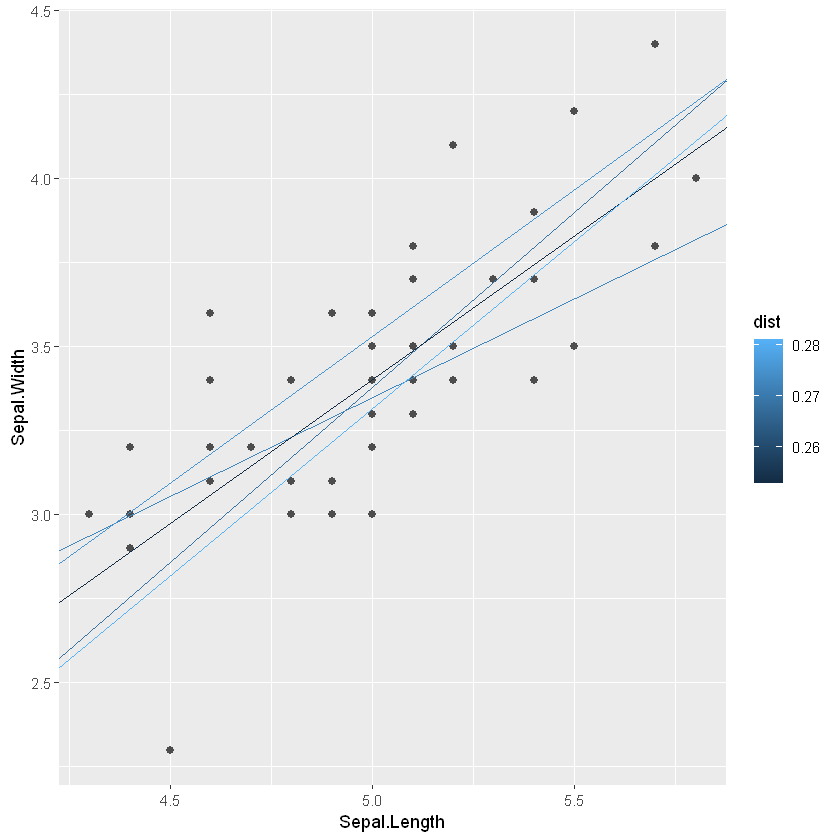

In [25]:
ggplot(setosa, aes(Sepal.Length, Sepal.Width)) + 
  geom_point(size = 2, colour = "grey30") + 
  geom_abline(
    aes(intercept = a1, slope = a2, colour = dist), 
    data = best
  )

In [26]:
top_n(models, 1, -dist)

a1,a2,dist
<dbl>,<dbl>,<dbl>
-0.868949,0.8542259,0.2529417


There is an optim function which will find the best out of all values, not just the one generated by our random models to begin with.

[1] -0.5682571  0.7982494

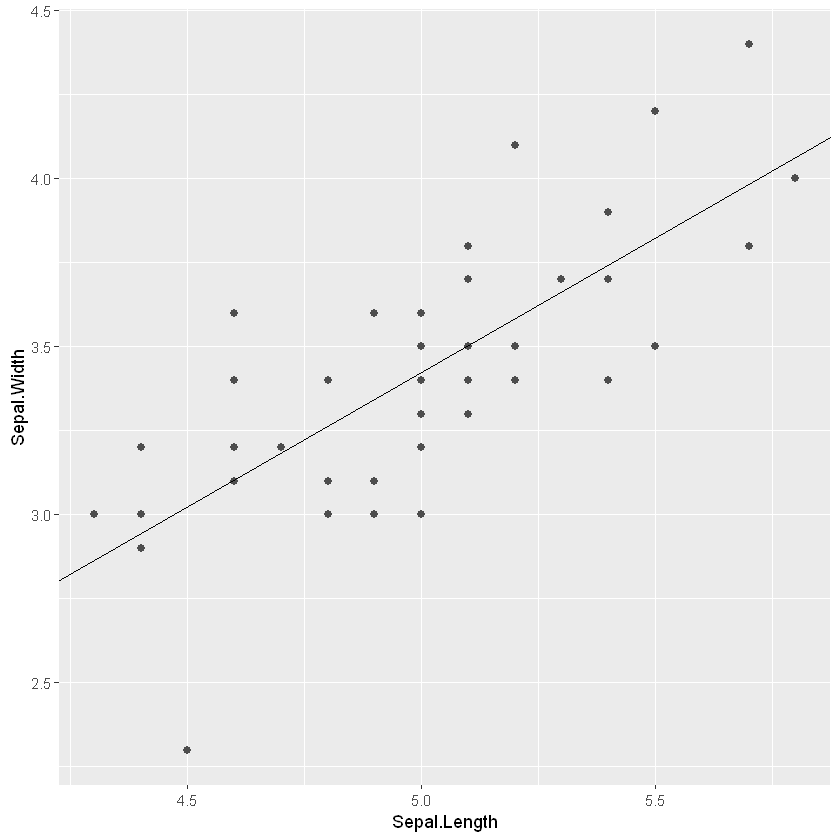

In [27]:
best <- optim(c(0, 0), measure_distance, data = setosa)
best$par

ggplot(setosa, aes(Sepal.Length, Sepal.Width)) + 
  geom_point(size = 2, colour = "grey30") + 
  geom_abline(intercept = best$par[1], slope = best$par[2])

Honestly and truly, everytime I have done this kind of modeling in `r` I have used the `lm()` (linear model) or `glm()` (generalized linear model) functions. This is a good exercise to help understand modeling, but the `lm()` function makes it simpler.

In [28]:
?lm

In [29]:
(lmodel <- lm(Sepal.Width~Sepal.Length, setosa))


Call:
lm(formula = Sepal.Width ~ Sepal.Length, data = setosa)

Coefficients:
 (Intercept)  Sepal.Length  
     -0.5694        0.7985  


In [30]:
summary(lmodel)


Call:
lm(formula = Sepal.Width ~ Sepal.Length, data = setosa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72394 -0.18273 -0.00306  0.15738  0.51709 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.5694     0.5217  -1.091    0.281    
Sepal.Length   0.7985     0.1040   7.681 6.71e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2565 on 48 degrees of freedom
Multiple R-squared:  0.5514,	Adjusted R-squared:  0.542 
F-statistic: 58.99 on 1 and 48 DF,  p-value: 6.71e-10


In [31]:
lm(price~., diamonds) %>% summary()


Call:
lm(formula = price ~ ., data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-21376.0   -592.4   -183.5    376.4  10694.2 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  5753.762    396.630   14.507  < 2e-16 ***
carat       11256.978     48.628  231.494  < 2e-16 ***
cut.L         584.457     22.478   26.001  < 2e-16 ***
cut.Q        -301.908     17.994  -16.778  < 2e-16 ***
cut.C         148.035     15.483    9.561  < 2e-16 ***
cut^4         -20.794     12.377   -1.680  0.09294 .  
color.L     -1952.160     17.342 -112.570  < 2e-16 ***
color.Q      -672.054     15.777  -42.597  < 2e-16 ***
color.C      -165.283     14.725  -11.225  < 2e-16 ***
color^4        38.195     13.527    2.824  0.00475 ** 
color^5       -95.793     12.776   -7.498 6.59e-14 ***
color^6       -48.466     11.614   -4.173 3.01e-05 ***
clarity.L    4097.431     30.259  135.414  < 2e-16 ***
clarity.Q   -1925.004     28.227  -68.197  < 2e-16 ***
clarity.

### Challenge

The iris dataset has 3 species. Pick another one, or a combination of two or all 3, and try to create a model to predict Sepal.Width based on Sepal.Length.